In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
montero_track_data = pd.read_csv('Montero_Track_Data.csv')
equal_track_data = pd.read_csv('Equal_Track_Data.csv')
montero_audio_features = pd.read_csv('Montero_Audio_Features.csv')
equal_audio_features = pd.read_csv('Equal_Audio_Features.csv')

In [3]:
equal_audio_features.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0.631,0.825,11,-3.971,1,0.0433,0.01670,0.000000,0.1220,0.427,129.942,audio_features,2JiHR4gCDjXwYVRDmwdk95,spotify:track:2JiHR4gCDjXwYVRDmwdk95,https://api.spotify.com/v1/tracks/2JiHR4gCDjXw...,https://api.spotify.com/v1/audio-analysis/2JiH...,195760,3
1,1,0.788,0.859,2,-2.724,1,0.0856,0.28100,0.000000,0.0424,0.822,141.020,audio_features,50nfwKoDiSYg8zOCREWAm5,spotify:track:50nfwKoDiSYg8zOCREWAm5,https://api.spotify.com/v1/tracks/50nfwKoDiSYg...,https://api.spotify.com/v1/audio-analysis/50nf...,207853,4
2,2,0.587,0.267,8,-9.206,1,0.0349,0.84000,0.000000,0.1210,0.352,98.845,audio_features,5QYnNhTKsN3kE7OaqILA1U,spotify:track:5QYnNhTKsN3kE7OaqILA1U,https://api.spotify.com/v1/tracks/5QYnNhTKsN3k...,https://api.spotify.com/v1/audio-analysis/5QYn...,185853,4
3,3,0.807,0.893,11,-3.745,0,0.0347,0.04510,0.000028,0.3660,0.537,126.011,audio_features,3rmo8F54jFF8OgYsqTxm5d,spotify:track:3rmo8F54jFF8OgYsqTxm5d,https://api.spotify.com/v1/tracks/3rmo8F54jFF8...,https://api.spotify.com/v1/audio-analysis/3rmo...,230747,4
4,4,0.520,0.849,9,-3.794,0,0.1860,0.00253,0.000000,0.1190,0.774,175.908,audio_features,4btFHqumCO31GksfuBLLv3,spotify:track:4btFHqumCO31GksfuBLLv3,https://api.spotify.com/v1/tracks/4btFHqumCO31...,https://api.spotify.com/v1/audio-analysis/4btF...,236907,4


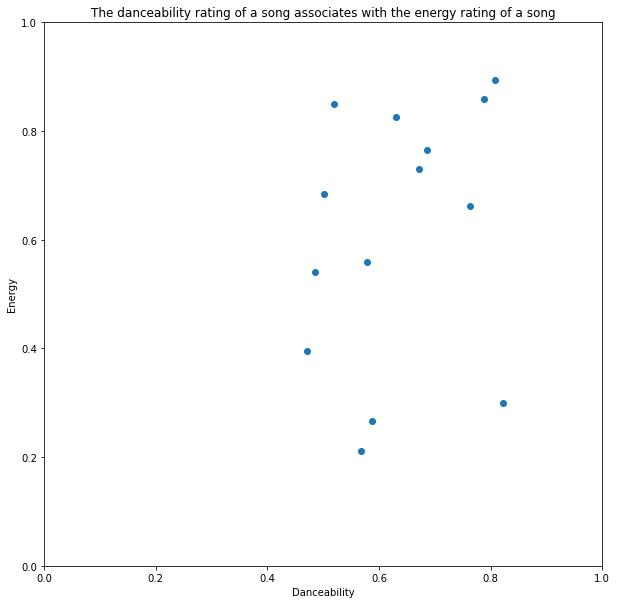

In [8]:
fig1, ax1 = plt.subplots(1, 1, figsize = (10, 10))
ax1.scatter(equal_audio_features['danceability'], equal_audio_features['energy'])
ax1.set_xlabel("Danceability")
ax1.set_ylabel("Energy")
ax1.set_title("The danceability rating of a song associates with the energy rating of a song")
ax1.set_ylim(0,1)
ax1.set_xlim(0,1)
plt.show()

In [9]:
stats.pearsonr(equal_audio_features['danceability'], equal_audio_features['energy'])

(0.2685987813008287, 0.35313358008439677)

In [11]:
reg_all = stats.linregress(equal_audio_features['danceability'], equal_audio_features['energy'])

In [12]:
reg_all

LinregressResult(slope=0.5102043013067536, intercept=0.28631472949990283, rvalue=0.2685987813008287, pvalue=0.35313358008439644, stderr=0.5281891059577386, intercept_stderr=0.3408178248049743)

In [16]:
equal_names = equal_track_data[['name', 'uri']]
equal_audio_features_names = pd.merge(equal_audio_features, equal_names, left_on = "uri", right_on = 'uri', how = 'left').drop("uri", axis = 1)

In [19]:
rm_one = equal_audio_features_names[equal_audio_features_names['name'] != "Sandman"]

In [23]:
reg_rm_one = stats.linregress(rm_one['danceability'], rm_one['energy'])
reg_rm_one

LinregressResult(slope=1.0197739168640638, intercept=0.0017462558263923178, rvalue=0.5219312245607796, pvalue=0.06732064677083284, stderr=0.5025010585642001, intercept_stderr=0.31637963692531557)

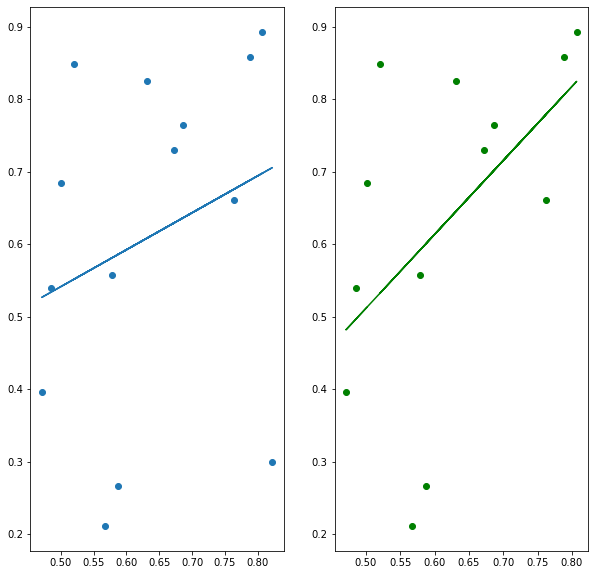

In [26]:
fig2, ax2 = plt.subplots(1, 2, figsize= (10, 10))
ax2[0].scatter(equal_audio_features_names['danceability'], equal_audio_features_names['energy'])
ax2[0].plot(equal_audio_features_names['danceability'], reg_all.intercept + reg_all.slope * equal_audio_features_names['danceability'])
# for i, label in enumerate(equal_audio_features_names['name']):
#     plt.annotate(label, (equal_audio_features_names['danceability'][i]+.002, equal_audio_features_names['energy'][i]+.002))
ax2[1].scatter(rm_one['danceability'], rm_one['energy'], color = 'g')
ax2[1].plot(rm_one['danceability'], reg_rm_one.intercept + reg_rm_one.slope * rm_one['danceability'], color = 'g')

plt.show()

In [38]:
import numpy as np

In [42]:
m_offset = np.random.randn(len(montero_audio_features.index)) * .02
m_offset

array([-0.01068422,  0.04010459,  0.02233076, -0.00901026,  0.00871439,
       -0.02038151, -0.0024439 , -0.00857167,  0.01792155, -0.00075023,
       -0.01702192,  0.0022534 , -0.02616897,  0.00644523, -0.00974561])

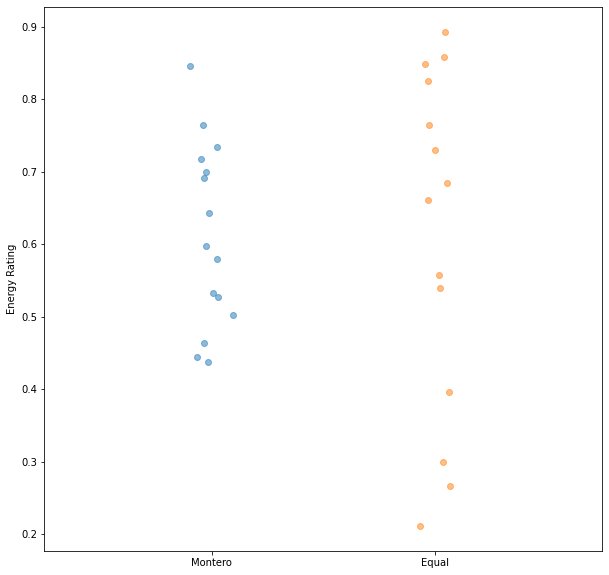

In [46]:
fig3, ax3 = plt.subplots(1, 1, figsize = (10, 10))

m_offset = np.random.randn(len(montero_audio_features.index)) * .002
e_offset = np.random.randn(len(equal_audio_features.index)) * .002
m_x = [-.02] * len(montero_audio_features.index)
e_x = [.02] * len(equal_audio_features.index)
m_jitter = m_x + m_offset
e_jitter = e_x + e_offset

ax3.scatter(m_jitter, montero_audio_features['energy'], alpha = .5)
ax3.scatter(e_jitter, equal_audio_features['energy'], alpha = .5)
ax3.set_xlim(-.05, .05)

ax3.set_xticks([-.02, .02])
ax3.set_xticklabels(['Montero', "Equal"])
ax3.set_ylabel("Energy Rating")
plt.show()


'''
Long Comment
Multi-line


'''